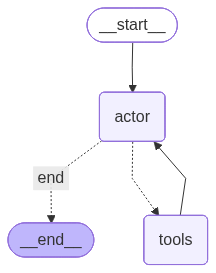

In [1]:
from dotenv import load_dotenv
from src.agents.react import ReActAgent
from IPython.display import Image, display
from appworld import AppWorld, load_task_ids
from src.state import State
from langchain.messages import HumanMessage
from src.utils.token_usage import calc_token_price

load_dotenv()

task_ids = load_task_ids(dataset_name='train')

task_id = task_ids[0]

env = AppWorld(
    task_id=task_id,
    ground_truth_mode='full'
)

react_agent = ReActAgent(env=env)

display(Image(react_agent.agent.get_graph().draw_mermaid_png()))

In [2]:
input_state: State = {
    'messages' : [
        HumanMessage(content=f"{env.task.instruction}")
    ],
}

result = react_agent.invoke(input_state)


[Actor] ✅ Request succeed on attept 1/3
[Actor] 🌏 Actor make tool call. > 1 tool calls
[Actor] ✅ Token usage is collected successfully.
[Tool | Action] ✅ Action is performed successfully.

[Actor] ✅ Request succeed on attept 1/3
[Actor] 🌏 Actor make tool call. > 1 tool calls
[Actor] ✅ Token usage is collected successfully.
[Tool | Action] ✅ Action is performed successfully.

[Actor] ✅ Request succeed on attept 1/3
[Actor] 🌏 Actor make tool call. > 1 tool calls
[Actor] ✅ Token usage is collected successfully.
[Tool | Action] ✅ Action is performed successfully.

[Actor] ✅ Request succeed on attept 1/3
[Actor] 🌏 Actor make tool call. > 1 tool calls
[Actor] ✅ Token usage is collected successfully.
[Tool | Action] ✅ Action is performed successfully.

[Actor] ✅ Request succeed on attept 1/3
[Actor] 🌏 Actor make tool call. > 1 tool calls
[Actor] ✅ Token usage is collected successfully.
[Tool | Action] ✅ Action is performed successfully.

[Actor] ✅ Request succeed on attept 1/3
[Actor] 🌏 Acto

In [8]:
from langchain.messages import AIMessage, ToolMessage, HumanMessage

for msg in result['messages']:
    if isinstance(msg, HumanMessage):
        print("👤 Human Instruction")
        print("======="*20)
        print(f"{msg.content}")
        print("======="*20)

    elif isinstance(msg, AIMessage):
        print("💼 Agent's Tool Call")
        for tool_call in msg.tool_calls:
            print("======="*20)
            print(f"Code : \n{tool_call['args']['code']}")
            print("======="*20)
    

    elif isinstance(msg, ToolMessage):
        print("🌏 Observation")
        print("======="*20)
        print(f"\n{msg.content}\n")
        print("======="*20)
    
    print("\n\n")

👤 Human Instruction
What is the title of the most-liked song in my Spotify playlists.



💼 Agent's Tool Call
Code : 
print(apis.api_docs.show_app_descriptions())



🌏 Observation

[
 {
  "name": "api_docs",
  "description": "An app to search and explore API documentation."
 },
 {
  "name": "supervisor",
  "description": "An app to access supervisor's personal information, account credentials, addresses, payment cards, and manage the assigned task."
 },
 {
  "name": "amazon",
  "description": "An online shopping app to buy products and manage orders, returns, etc."
 },
 {
  "name": "phone",
  "description": "An app to find and manage contact information for friends, family members, etc., send and receive messages, and manage alarms."
 },
 {
  "name": "file_system",
  "description": "A file system app to create and manage files and folders."
 },
 {
  "name": "spotify",
  "description": "A music streaming app to stream songs and manage song, album and playlist libraries."
 },
 {
  "name":

In [3]:
eval_result = env.evaluate()

────────────────────────────────────────────────── Overall Stats ──────────────────────────────────────────────────

Num Passed Tests : 1

Num Failed Tests : 1

Num Total  Tests : 2

───────────────────────────────────────────────────── Passes ──────────────────────────────────────────────────────

>> Passed Requirement

assert no model changes.

────────────────────────────────────────────────────── Fails ──────────────────────────────────────────────────────

>> Failed Requirement

assert answers match.

```python
with test(
    """
    assert answers match.
    """
):
    test.answer(predicted_answer, ground_truth_answer)
```
----------
AssertionError:  '<<not_given>>' == 'a love that never was'

In [4]:
eval_result.task_completed

False

In [5]:
print(eval_result.failures[0]['trace'])

```python
with test(
    """
    assert answers match.
    """
):
    test.answer(predicted_answer, ground_truth_answer)
```
----------
AssertionError:  '<<not_given>>' == 'a love that never was'


In [15]:
print(eval_result.failures[0]['requirement'])

assert answers match.


In [6]:
eval_result.test_data

[{'requirement': 'assert answers match.', 'label': 'no_op_fail'},
 {'requirement': 'assert no model changes.', 'label': 'no_op_pass'}]

In [7]:
eval_result.passes

[{'requirement': 'assert no model changes.', 'label': 'no_op_pass'}]

In [4]:
print(f"Total Requirements : {eval_result.total_count}")
print(f"    - Passed Requirements : {eval_result.pass_count}")
print(f"    - Failed Requirements : {eval_result.fail_count}")

Total Requirements : 2
    - Passed Requirements : 1
    - Failed Requirements : 1


In [5]:
print(f"Total Tokens : {result['total_tokens']}")
print(f"    - Input Tokens : {result['input_tokens']}")
print(f"    - Output Tokens : {result['output_tokens']}")

Total Tokens : 160679
    - Input Tokens : 159766
    - Output Tokens : 913


In [6]:
price_info = calc_token_price(
    model='gpt-4o',
    input_tokens=result['input_tokens'],
    output_tokens=result['output_tokens']
)

print(f"Total Price : {price_info['total_token_price']:.2f} $")
print(f"    - Input Tokens : {price_info['input_token_price']:.2f} $")
print(f"    - Output Tokens : {price_info['output_token_price']:.2f} $")

Total Price : 0.41 $
    - Input Tokens : 0.40 $
    - Output Tokens : 0.01 $


In [35]:
str({'a':'abc', 'b' : 'bca'})

"{'a': 'abc', 'b': 'bca'}"